In [1]:
import numpy as np
import matplotlib.pyplot as plt
from optimization import *
from oracles import *

# Эксперименты с методом барьеров в LASSO

### 1.1. Поведение метода для различных значений гаммы

In [4]:
np.random.seed(42)
n_samples = 150
n_features = 60
A = np.random.randn(n_samples, n_features)
b = np.random.randn(n_samples)
reg_coef = 1e-4
x0 = np.zeros(n_features)
u0 = np.array([15] * n_features)
gammas = [4, 16, 64, 128, 512]

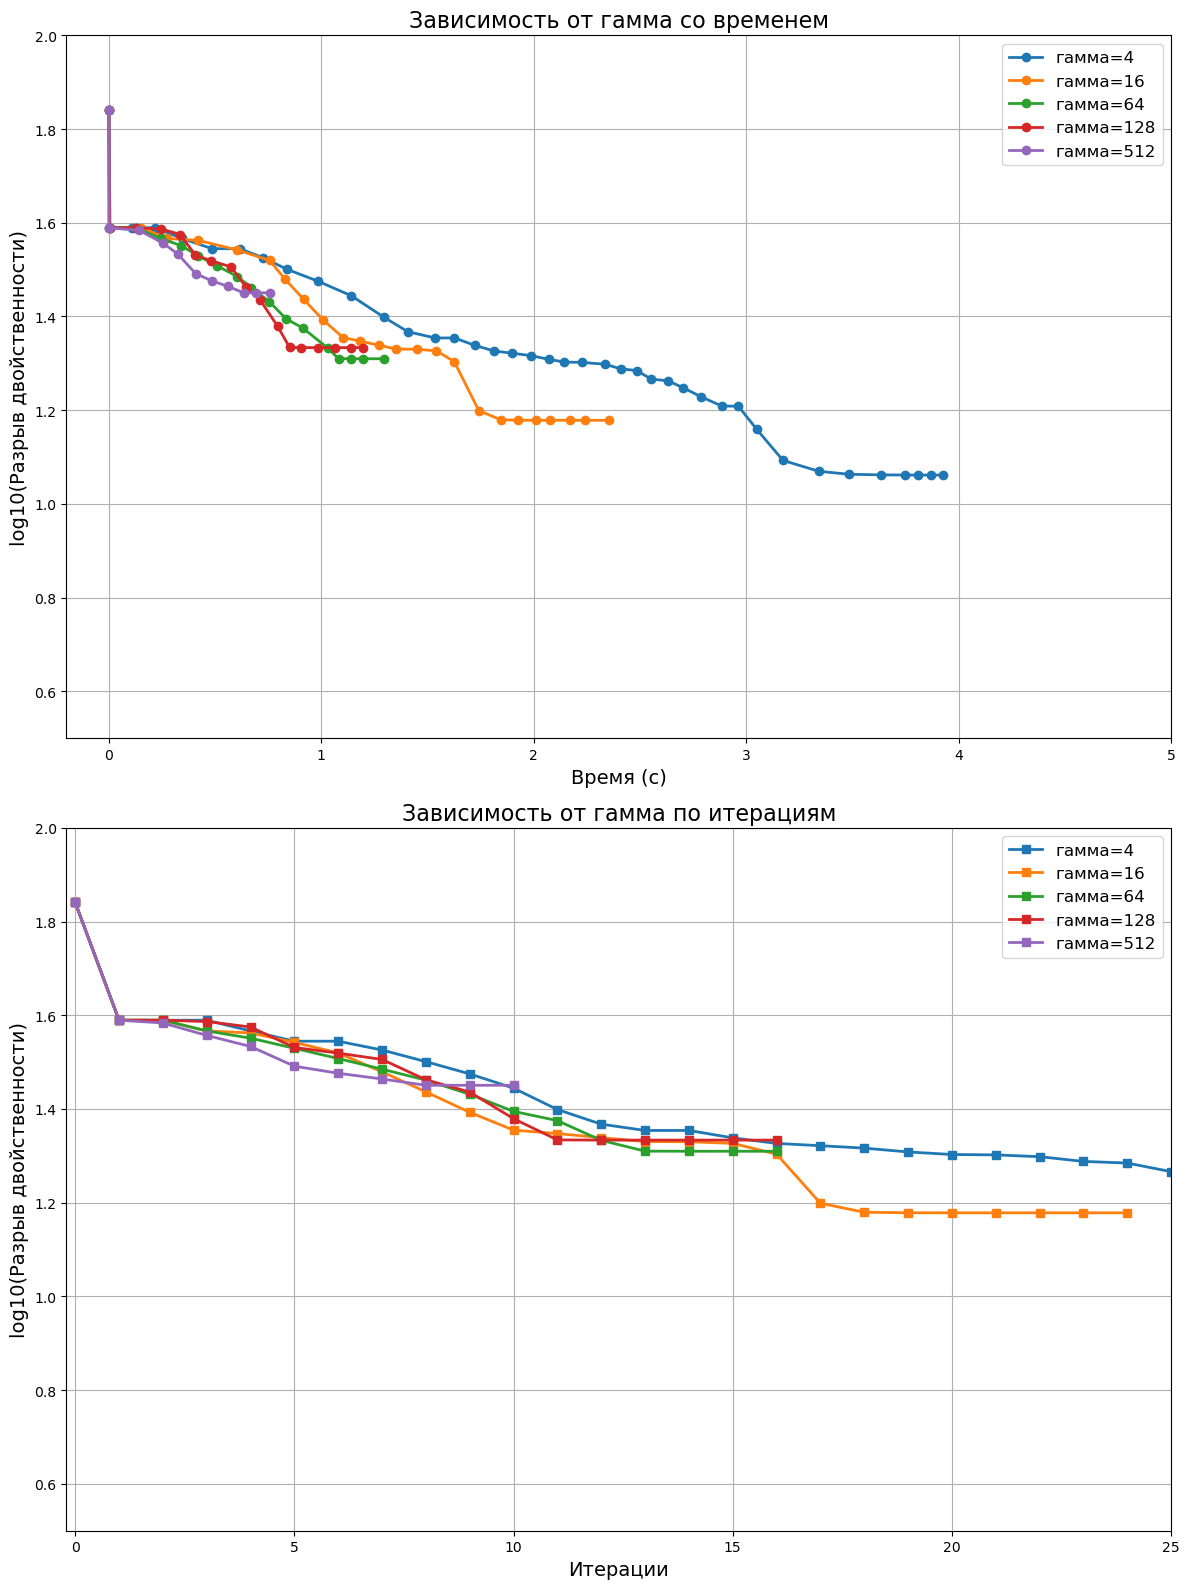

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(12, 16))

for gamma in gammas:
    _, _, history = barrier_method_lasso(A, b, reg_coef, x0, u0, gamma=gamma, trace=True, max_iter=50)
    axes[0].plot(history['time'][:len(np.unique(history['duality_gap']))], np.log10(np.unique(history['duality_gap'])[::-1]), 
                 label=f'гамма={gamma}', linewidth=2, marker='o')
axes[0].set_title('Зависимость от гамма со временем', fontsize=16)
axes[0].legend(loc='best', fontsize=12)
axes[0].set_xlabel('Время (с)', fontsize=14)
axes[0].set_ylabel('log10(Разрыв двойственности)', fontsize=14)
axes[0].set_ylim(0.5, 2.0)
axes[0].set_xlim(-0.2, 5)
axes[0].grid(True)

for gamma in gammas:
    _, _, history = barrier_method_lasso(A, b, reg_coef, x0, u0, gamma=gamma, trace=True, max_iter=50)
    axes[1].plot([i for i in range(len(np.unique(history['duality_gap']) + 1))], np.log10(np.unique(history['duality_gap'])[::-1]), 
                 label=f'гамма={gamma}', linewidth=2, marker='s')
axes[1].set_title('Зависимость от гамма по итерациям', fontsize=16)
axes[1].legend(loc='best', fontsize=12)
axes[1].set_xlabel('Итерации', fontsize=14)
axes[1].set_ylabel('log10(Разрыв двойственности)', fontsize=14)
axes[1].set_ylim(0.5, 2.0)
axes[1].set_xlim(-0.2, 25)
axes[1].grid(True)

plt.tight_layout()
plt.show()

### 1.2 Поведение метода для различных значений ε_inner

In [8]:
np.random.seed(42)
n_samples = 150
n_features = 60
A = np.random.randn(n_samples, n_features)
b = np.random.randn(n_samples)
reg_coef = 1e-4
x0 = np.zeros(n_features)
u0 = np.array([15] * n_features)
fixed_gamma = 128
epsilons = [1e-8, 1e-6, 1e-5, 1e-4, 1e-2]

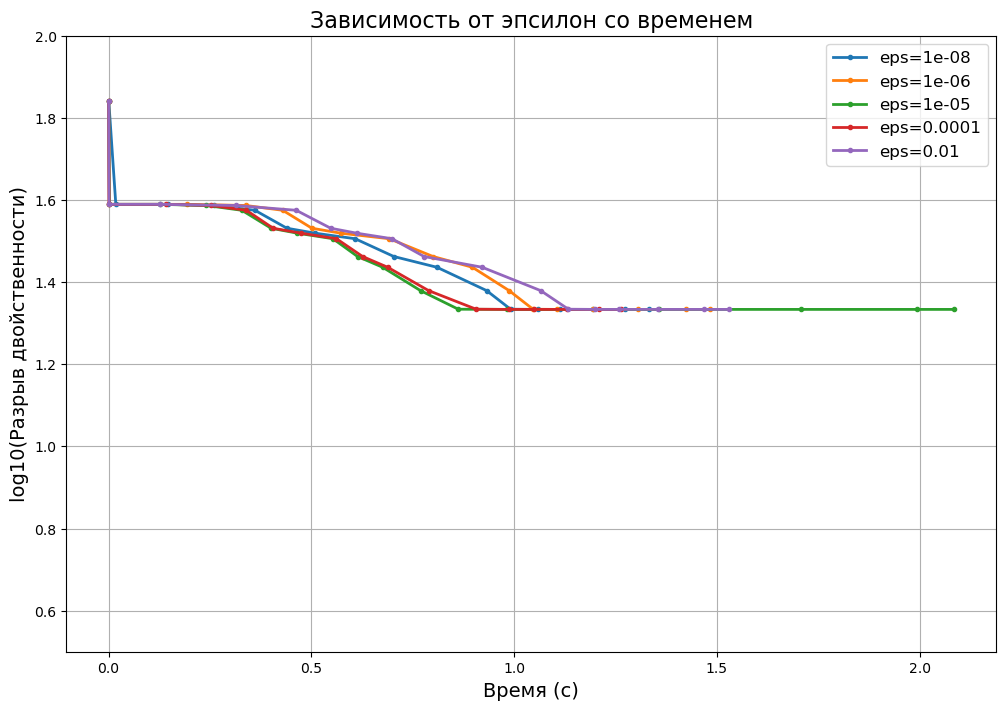

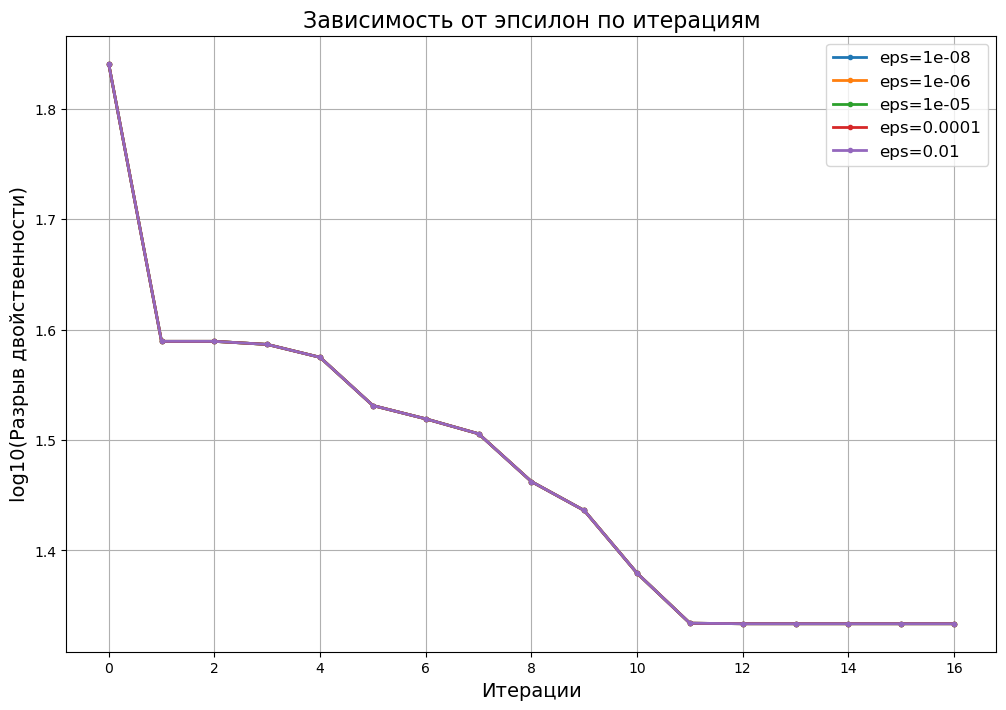

In [9]:
# График зависимости от времени
plt.figure(figsize=(12, 8))
for epsilon in epsilons:
    _, _, history = barrier_method_lasso(A, b, reg_coef, x0, u0, gamma=fixed_gamma, tolerance_inner=epsilon, trace=True, max_iter=50)
    plt.plot(history['time'][:len(np.unique(history['duality_gap']))], np.log10(np.unique(history['duality_gap'])[::-1]), 
             label=f'eps={epsilon}', linewidth=2, marker='.')
plt.title('Зависимость от эпсилон со временем', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.xlabel('Время (с)', fontsize=14)
plt.ylabel('log10(Разрыв двойственности)', fontsize=14)
plt.ylim(0.5, 2.0)
plt.grid(True)
plt.show()

# График зависимости от номера итерации
plt.figure(figsize=(12, 8))
for epsilon in epsilons:
    _, _, history = barrier_method_lasso(A, b, reg_coef, x0, u0, gamma=fixed_gamma, tolerance_inner=epsilon, trace=True, max_iter=50)
    plt.plot([i for i in range(len(np.unique(history['duality_gap']) + 1))], np.log10(np.unique(history['duality_gap'])[::-1]), 
             label=f'eps={epsilon}', linewidth=2, marker='.')
plt.title('Зависимость от эпсилон по итерациям', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.xlabel('Итерации', fontsize=14)
plt.ylabel('log10(Разрыв двойственности)', fontsize=14)
plt.grid(True)
plt.show()

### 1.3 Поведение метода для различных значений размерности пространства n

In [16]:
np.random.seed(42)
n_samples = 150
A = np.random.randn(n_samples, n_features)
b = np.random.randn(n_samples)
reg_coef = 1e-4
x0 = np.zeros(n_features)
u0 = np.array([15] * n_features)
fixed_gamma = 128
epsilons = [1e-6]
n_features_list = [30, 60, 90, 120, 150]

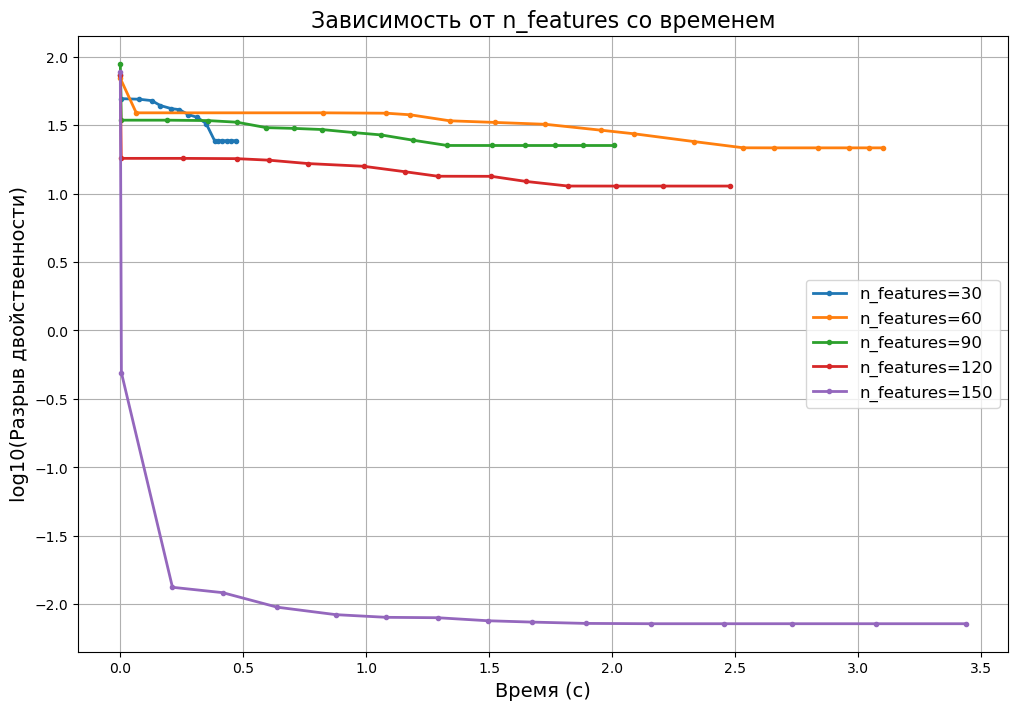

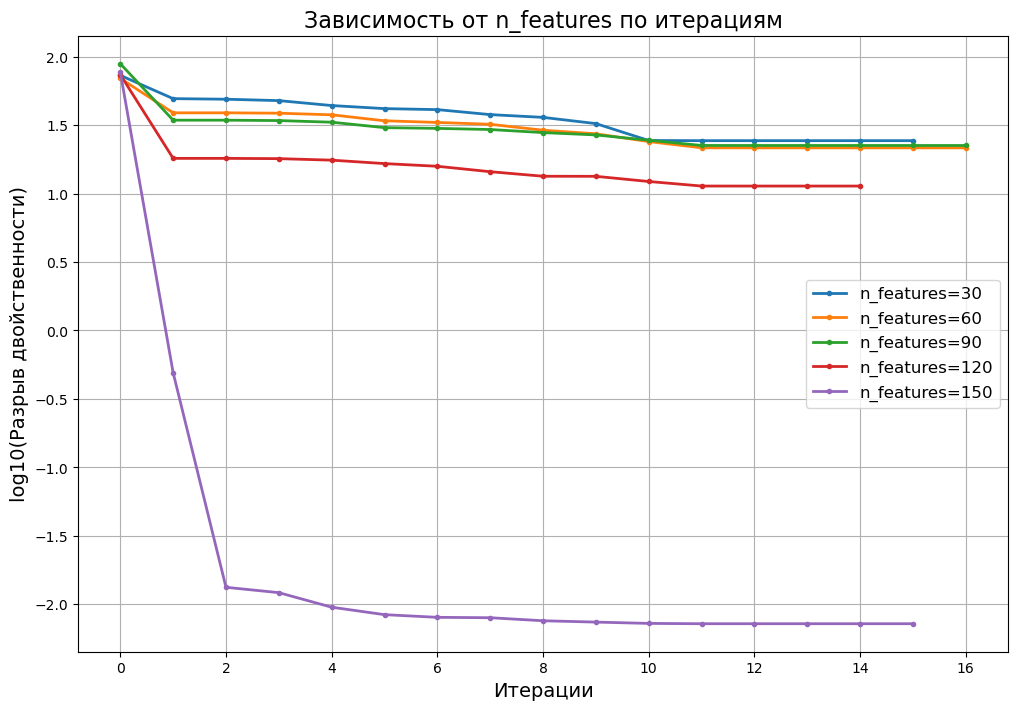

In [17]:
plt.figure(figsize=(12, 8))
for n_features in n_features_list:
    np.random.seed(42)
    A = np.random.randn(n_samples, n_features)
    b = np.random.randn(n_samples)
    x0 = np.zeros(n_features)
    u0 = np.array([15] * n_features)
    
    for epsilon in epsilons:
        _, _, history = barrier_method_lasso(A, b, reg_coef, x0, u0, gamma=fixed_gamma, tolerance_inner=epsilon, trace=True, max_iter=50)
        plt.plot(history['time'][:len(np.unique(history['duality_gap']))], 
                 np.log10(np.unique(history['duality_gap'])[::-1]), 
                 label=f'n_features={n_features}', linewidth=2, marker='.')

plt.title('Зависимость от n_features со временем', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.xlabel('Время (с)', fontsize=14)
plt.ylabel('log10(Разрыв двойственности)', fontsize=14)
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
for n_features in n_features_list:
    np.random.seed(42)
    A = np.random.randn(n_samples, n_features)
    b = np.random.randn(n_samples)
    x0 = np.zeros(n_features)
    u0 = np.array([15] * n_features)
    
    for epsilon in epsilons:
        _, _, history = barrier_method_lasso(A, b, reg_coef, x0, u0, gamma=fixed_gamma, tolerance_inner=epsilon, trace=True, max_iter=50)
        plt.plot([i for i in range(len(np.unique(history['duality_gap']) + 1))], 
                 np.log10(np.unique(history['duality_gap'])[::-1]), 
                 label=f'n_features={n_features}', linewidth=2, marker='.')

plt.title('Зависимость от n_features по итерациям', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.xlabel('Итерации', fontsize=14)
plt.ylabel('log10(Разрыв двойственности)', fontsize=14)
plt.grid(True)
plt.show()


### 1.4 Поведение метода для различных значений paзмера выборки m

In [20]:
np.random.seed(42)
n_features = 60
n_samples_list = [100, 150, 200, 250, 300]
reg_coef = 1e-4
A = np.random.randn(n_samples, n_features)
b = np.random.randn(n_samples)
fixed_gamma = 128
epsilons = [1e-6]

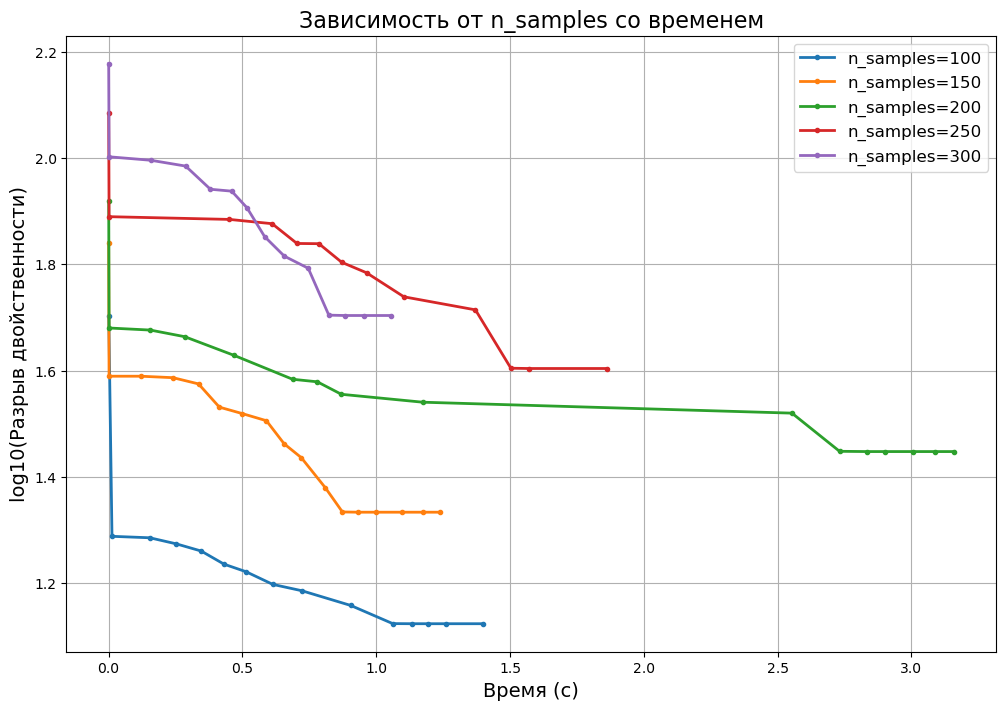

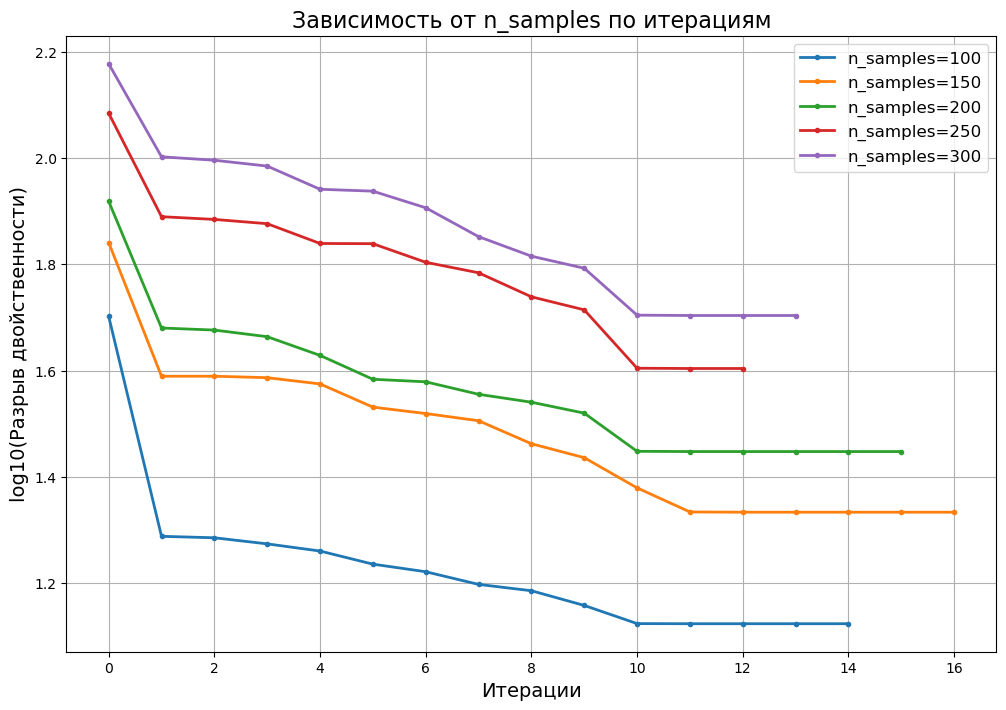

In [21]:
plt.figure(figsize=(12, 8))
for n_samples in n_samples_list:
    np.random.seed(42)
    A = np.random.randn(n_samples, n_features)
    b = np.random.randn(n_samples)
    x0 = np.zeros(n_features)
    u0 = np.array([15] * n_features)
    
    for epsilon in epsilons:
        _, _, history = barrier_method_lasso(A, b, reg_coef, x0, u0, gamma=fixed_gamma, tolerance_inner=epsilon, trace=True, max_iter=50)
        plt.plot(history['time'][:len(np.unique(history['duality_gap']))], 
                 np.log10(np.unique(history['duality_gap'])[::-1]), 
                 label=f'n_samples={n_samples}', linewidth=2, marker='.')

plt.title('Зависимость от n_samples со временем', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.xlabel('Время (с)', fontsize=14)
plt.ylabel('log10(Разрыв двойственности)', fontsize=14)
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
for n_samples in n_samples_list:
    np.random.seed(42)
    A = np.random.randn(n_samples, n_features)
    b = np.random.randn(n_samples)
    x0 = np.zeros(n_features)
    u0 = np.array([15] * n_features)
    
    for epsilon in epsilons:
        _, _, history = barrier_method_lasso(A, b, reg_coef, x0, u0, gamma=fixed_gamma, tolerance_inner=epsilon, trace=True, max_iter=50)
        plt.plot([i for i in range(len(np.unique(history['duality_gap']) + 1))], 
                 np.log10(np.unique(history['duality_gap'])[::-1]), 
                 label=f'n_samples={n_samples}', linewidth=2, marker='.')

plt.title('Зависимость от n_samples по итерациям', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.xlabel('Итерации', fontsize=14)
plt.ylabel('log10(Разрыв двойственности)', fontsize=14)
plt.grid(True)
plt.show()


### 1.5 Поведение метода для различных значений коэффициентов регуляризации λ

In [14]:
np.random.seed(42)
n_samples = 150
n_features = 60
A = np.random.randn(n_samples, n_features)
b = np.random.randn(n_samples)

x0 = np.zeros(n_features)
u0 = np.array([15] * n_features)
fixed_gamma = 128
epsilons = [1e-6]

reg_coefs = [1e-5, 1e-4, 1e-3, 1e-1]

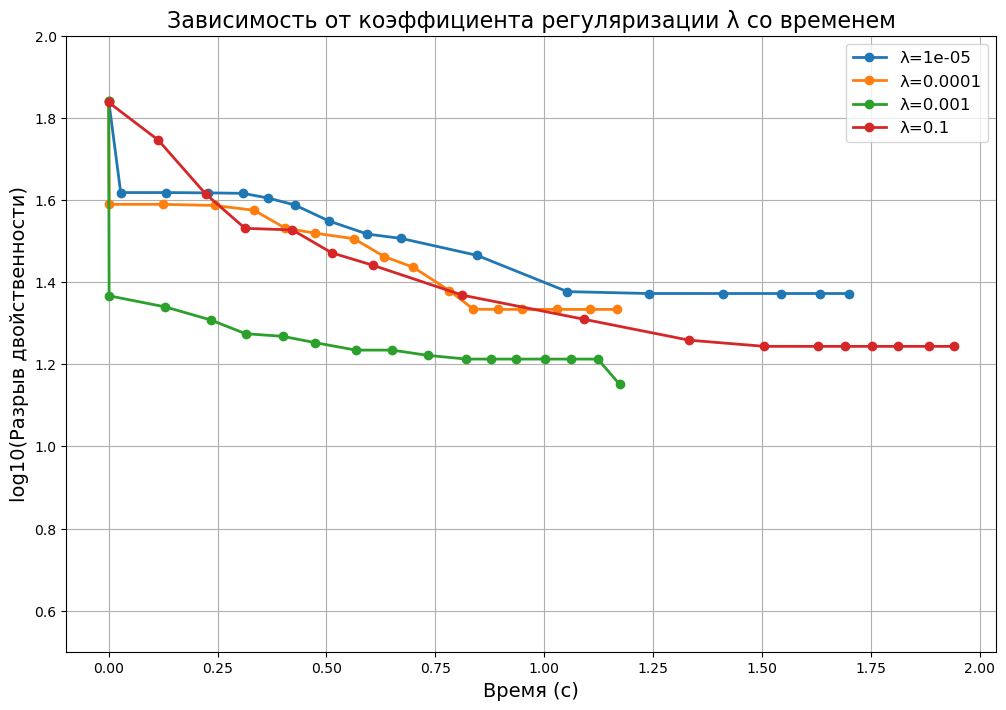

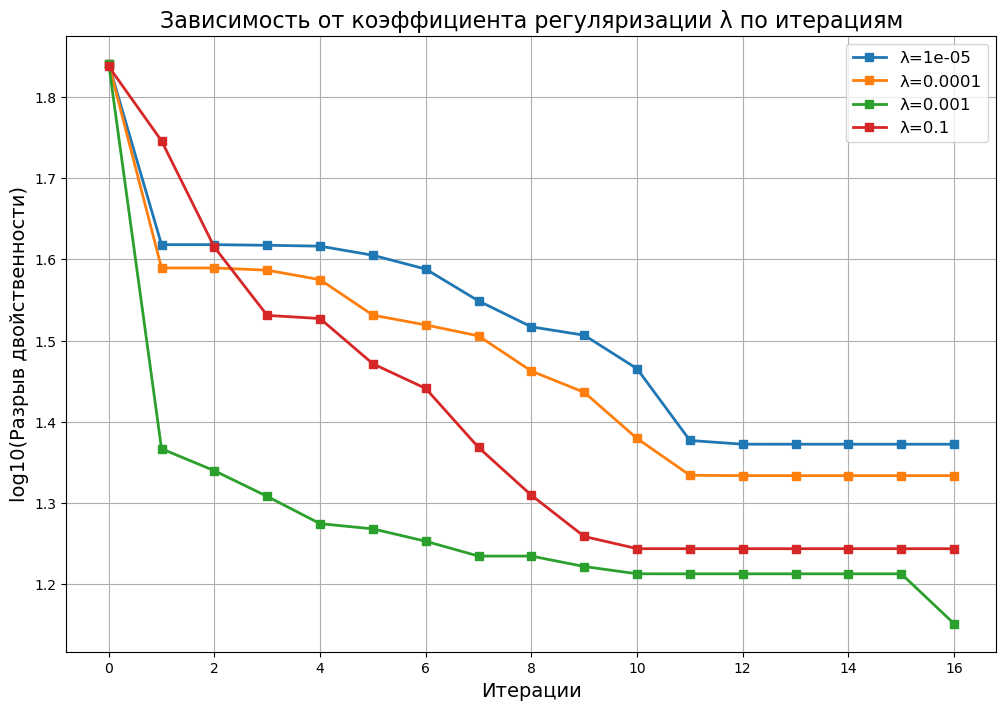

In [15]:
plt.figure(figsize=(12, 8))
for reg_coef in reg_coefs:
    _, _, history = barrier_method_lasso(A, b, reg_coef, x0, u0, gamma=fixed_gamma, tolerance_inner=epsilons[0], trace=True, max_iter=50)
    plt.plot(history['time'][:len(np.unique(history['duality_gap']))], 
             np.log10(np.unique(history['duality_gap'])[::-1]), 
             label=f'λ={reg_coef}', linewidth=2, marker='o')

plt.title('Зависимость от коэффициента регуляризации λ со временем', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.xlabel('Время (с)', fontsize=14)
plt.ylabel('log10(Разрыв двойственности)', fontsize=14)
plt.ylim(0.5, 2.0)
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
for reg_coef in reg_coefs:
    _, _, history = barrier_method_lasso(A, b, reg_coef, x0, u0, gamma=fixed_gamma, tolerance_inner=epsilons[0], trace=True, max_iter=50)
    plt.plot([i for i in range(len(np.unique(history['duality_gap']) + 1))], 
             np.log10(np.unique(history['duality_gap'])[::-1]), 
             label=f'λ={reg_coef}', linewidth=2, marker='s')

plt.title('Зависимость от коэффициента регуляризации λ по итерациям', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.xlabel('Итерации', fontsize=14)
plt.ylabel('log10(Разрыв двойственности)', fontsize=14)
plt.grid(True)
plt.show()